In [ ]:
# GCN 对海豚社会关系网络进行构造

GCN的背景：  
+ 自然语言处理操作对象是序列信息，一维的结构 => 使用RNN模型针对序列结构进行操作，使得序列前后的信息互相影响，很好地捕捉序列的特征  
+ 图片或者自然语言，都属于欧式空间的数据 => 有维度的概念，数据的特点是结构规则  
+ 现实生活中，很多是不规则的数据结构，典型的就是图结构，或称拓扑结构，如社交网络、化学分子结构、知识图谱等等  
+ 即使是语言，实际上其内部也是复杂的树形结构，也是一种图结构  
+ 针对图片，在做目标识别的时候，我们关注的实际上只是二维图片上的部分关键点，这些点组成的也是一个图的结构  

GCN算法：  
+ 对于一个图网络G=（V，E），有N个节点，每个节点都有自己的特征，目标是要学习图上的信号或特征的一个映射 
GCN模型的输入为矩阵X和A：   
+ 矩阵X，表示这些节点特征，N×D维矩阵  
+ 矩阵A，表示各个节点之间的关系，N×N维矩阵，也称为邻接矩阵（adjacency matrix）

基于dolphins.gml数据，对于海豚社会关系网络进行探索,
+ 首先对数据集进行构建图网络,提取GCN模型需要的特征矩阵邻矩阵A和度矩阵X，构建拉普拉斯算子X^-1*A  
+ 构建隐藏层参数，参数初始化为均值0、方差为1的正太分布  
+ 定义激活函数Relu,比较在激活函数和没有激活函数情况下结果的差别  

In [1]:
# 使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

import os
path = os.path.expanduser('~/data/')

In [2]:
# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges)
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

In [3]:
# 数据加载，构造图
G = nx.read_gml(path + 'BI/dolphins.gml')
print(type(G))

<class 'networkx.classes.graph.Graph'>


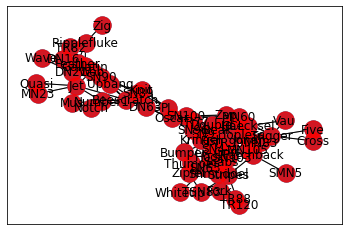

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [4]:
# 可视化
plot_graph(G)
print(list(G.nodes()))

In [5]:
# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
print('A=\n', A) 

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
A=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [6]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I # 让对角线元素为1
print('A_hat=\n', A_hat)

A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [7]:
# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)

D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]
D_hat=
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [8]:
# 初始化权重, normal 正态分布 loc均值 scale标准差（0-1正太分布)
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)

W_1=
 [[ 4.74924806e-01  1.27716231e-01  1.21464008e+00 -1.74406239e+00]
 [ 2.81517563e+00  2.98954528e-01 -9.71213468e-01 -3.73273509e-01]
 [ 9.18894640e-01  1.86169014e+00  6.75217267e-01 -2.80463332e-01]
 [-1.03230751e+00 -1.03795524e-01  1.47231042e+00 -1.08942198e+00]
 [ 1.26248965e-01  7.25830092e-01 -3.09432863e-01 -1.91285368e+00]
 [ 2.41353801e-01  6.83947216e-01  1.97995494e-01  5.52877135e-01]
 [-1.72350796e+00  1.59991960e+00 -2.06448291e+00 -2.75941364e+00]
 [ 4.25954149e-01  6.37172781e-01 -1.42780645e+00 -6.45121334e-01]
 [-4.70921664e-01 -1.21053740e+00 -9.38244528e-01  5.06843188e-01]
 [ 1.85217019e+00 -2.39475736e-01  1.18321707e-01  1.39926522e+00]
 [-8.48443221e-01  2.05609851e+00  6.05707723e-01  1.57359115e-01]
 [ 2.69218294e-02  8.98106838e-01  3.09060064e-01  1.02981576e+00]
 [ 1.83991600e+00  7.01904212e-01  2.80655839e+00 -1.05906627e+00]
 [ 8.89433660e-01 -1.10705575e+00  1.19520815e+00  1.35044562e-01]
 [ 3.01189880e+00 -6.06809891e-01 -3.28663964e-01  6.161

In [9]:
# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output=\n', output)

output=
 [[0.         1.02261599]
 [0.         1.51889578]
 [0.         1.65612777]
 [0.         0.46062928]
 [0.01488403 1.65695683]
 [0.         1.09582348]
 [0.         0.93426667]
 [0.         0.87049299]
 [0.         0.45140899]
 [0.         1.18202716]
 [0.         1.03552927]
 [0.         1.05250022]
 [0.         1.99488283]
 [0.         1.16630944]
 [0.         1.15883313]
 [0.         1.3144902 ]
 [0.         0.88788422]
 [0.         0.84013752]
 [0.         0.87453087]
 [0.         0.6156211 ]
 [0.         1.21507897]
 [0.         0.86260931]
 [0.         0.63813488]
 [0.         1.49710624]
 [0.         1.02451933]
 [0.         1.64563081]
 [0.         1.63970218]
 [0.         1.2972781 ]
 [0.         0.45811305]
 [0.         0.50220044]
 [0.         1.09019502]
 [0.         0.57478032]
 [0.         1.30886265]
 [0.         0.84062151]
 [0.         1.3930812 ]
 [0.         1.01004292]
 [0.         1.14423259]
 [0.         1.76812259]
 [0.         1.17807714]
 [0.         1.1

In [10]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)


feature_representations=
 {'Beak': array([0.        , 1.02261599]), 'Beescratch': array([0.        , 1.51889578]), 'Bumper': array([0.        , 1.65612777]), 'CCL': array([0.        , 0.46062928]), 'Cross': array([0.01488403, 1.65695683]), 'DN16': array([0.        , 1.09582348]), 'DN21': array([0.        , 0.93426667]), 'DN63': array([0.        , 0.87049299]), 'Double': array([0.        , 0.45140899]), 'Feather': array([0.        , 1.18202716]), 'Fish': array([0.        , 1.03552927]), 'Five': array([0.        , 1.05250022]), 'Fork': array([0.        , 1.99488283]), 'Gallatin': array([0.        , 1.16630944]), 'Grin': array([0.        , 1.15883313]), 'Haecksel': array([0.       , 1.3144902]), 'Hook': array([0.        , 0.88788422]), 'Jet': array([0.        , 0.84013752]), 'Jonah': array([0.        , 0.87453087]), 'Knit': array([0.       , 0.6156211]), 'Kringel': array([0.        , 1.21507897]), 'MN105': array([0.        , 0.86260931]), 'MN23': array([0.        , 0.63813488]), 'MN60': a

In [11]:
# 不同节点value，绘制不同的颜色
# def getValue(value):
#     colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
#     return colorList[int(value)]

# 绘制output，节点GCN embedding可视化
def plot_node(output, title):
    for i in range(len(nodes)):
        node_name = nodes[i]
        #value = G.nodes[node_name]['value']
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),alpha=0.5,s = 250) # ,color = getValue(value),
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()

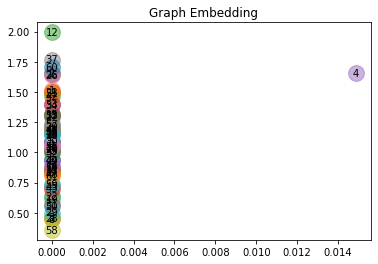

In [12]:
plot_node(output, 'Graph Embedding')

output(去掉relu)=
: [[ 7.93196413e-01  1.15181689e+00]
 [ 8.27210668e-02  9.72171423e-01]
 [ 9.07731605e-01  1.68061692e+00]
 [ 1.28018785e+00  1.26976802e-02]
 [ 3.68889325e-01  1.63760374e+00]
 [ 6.75951673e-01  7.97907529e-01]
 [ 8.39783830e-01  6.39018181e-01]
 [ 4.77744792e-02  1.45888201e-01]
 [ 9.89379738e-01 -6.73550754e-02]
 [-2.22236480e-02  9.16893713e-01]
 [ 6.81110891e-01  1.03953956e+00]
 [-1.14404134e+00  1.15680420e+00]
 [ 3.69422721e-01  2.29165812e+00]
 [ 7.93820693e-02  9.12240216e-01]
 [ 2.50707234e-01  1.07782648e+00]
 [ 2.84574220e-01  1.13519297e+00]
 [ 5.10220278e-01  9.55442894e-01]
 [-1.12124141e-01  1.37753649e-01]
 [ 6.08498128e-01  9.14241493e-01]
 [-5.83798811e-02 -3.01138652e-01]
 [ 7.58837607e-01  1.20111054e+00]
 [ 4.89476564e-01  7.96133529e-01]
 [-4.17046301e-01  2.43894217e-01]
 [ 7.43854198e-01  1.33387784e+00]
 [ 5.13474611e-01  1.11812373e+00]
 [-8.51928404e-02  1.17331114e+00]
 [-3.14768163e-01  8.44469448e-01]
 [-2.58729261e-01  6.68465756e-01]
 [

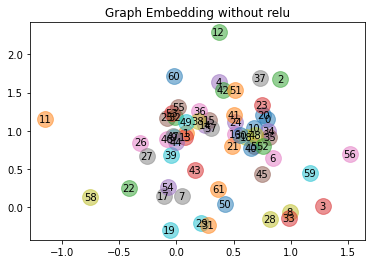

In [13]:
# 尝试去掉激活函数relu，重新运行一遍，发现效果反而更好
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(去掉relu)=\n:",output)

plot_node(output, 'Graph Embedding without relu')